<a href="https://colab.research.google.com/github/Rizwankaka/Agentic-AI-/blob/main/Datafy%20Workshop/Autogen/autogen_multiagent_customer_support_agent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Intelligent Customer Support with AutoGen Framework**

## **Introduction**
This Colab notebook demonstrates how to build a sophisticated customer support automation system using Microsoft's AutoGen framework. By leveraging multiple specialized AI agents, we create a comprehensive support pipeline that can handle customer inquiries, troubleshoot issues, and escalate complex cases when necessary.

## **Goal**
The primary objective of this notebook is to showcase how to orchestrate multiple AI agents to create a robust customer support system. Our implementation features seven specialized agents working in harmony:

- An Inquiry Agent for initial classification of customer issues
- A Response Agent for generating appropriate automated replies
- A Knowledge Base Agent for searching relevant solutions
- A Troubleshooting Agent for step-by-step problem resolution
- A Feedback Agent for gathering customer satisfaction data
- An Escalation Agent for identifying cases requiring human intervention
- A Human Support Agent for managing handoffs to human representatives

The system demonstrates advanced concepts in multi-agent architectures, including nested conversations, agent coordination, and automated workflow management. Through this notebook, you'll learn how to create and configure multiple agents with specific roles and orchestrate their interactions to handle complex customer support scenarios effectively.

### AutoGen Multi-Agent Workflow for Intelligent Customer Support

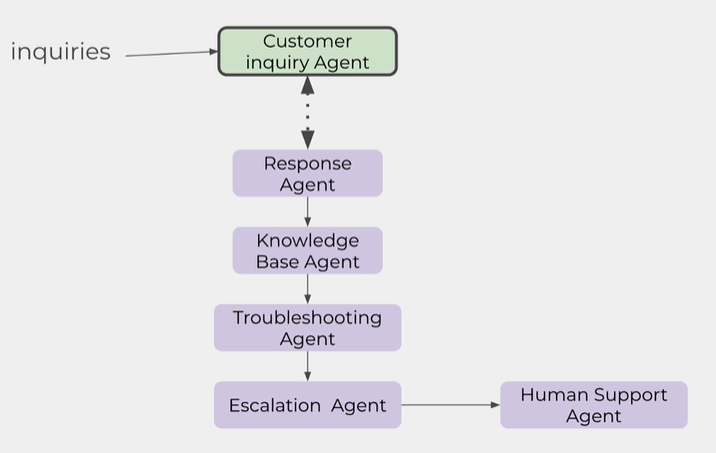

### Let's start

In [6]:
%pip install -qU pyautogen dask[dataframe]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 14.2 MB/s eta 0:00:00


In [7]:
from autogen import AssistantAgent, UserProxyAgent, ConversableAgent

In [24]:
import os
from google.colab import userdata
os.environ['OPENAI_API_KEY'] = userdata.get('OPENAI_API_KEY')

# Define LLM configuration
llm_config = {
    "model": "gpt-4o-mini",
    "temperature": 0.4,
    "api_key": os.environ["OPENAI_API_KEY"],
}

In [25]:
# Define the customer inquiry agent
inquiry_agent = ConversableAgent(
    name="Inquiry_Agent",
    llm_config=llm_config,
    system_message="You handle customer inquiries and classify them.",
)

# Define the response agent
response_agent = ConversableAgent(
    name="Response_Agent",
    llm_config=llm_config,
    system_message="You provide automated responses based on the inquiry classification.",
)

# Define the knowledge base agent
knowledge_base_agent = ConversableAgent(
    name="Knowledge_Base_Agent",
    llm_config=llm_config,
    system_message="You search the company's knowledge base for solutions to customer issues.",
)

# Define the troubleshooting agent
troubleshooting_agent = ConversableAgent(
    name="Troubleshooting_Agent",
    llm_config=llm_config,
    system_message="You guide customers through troubleshooting steps to resolve their issues.",
)

# Define the feedback agent
feedback_agent = ConversableAgent(
    name="Feedback_Agent",
    llm_config=llm_config,
    system_message="You collect customer feedback on the resolution process.",
)

# Define the escalation agent
escalation_agent = ConversableAgent(
    name="Escalation_Agent",
    llm_config=llm_config,
    system_message="You identify cases that require human intervention.",
)

# Define the human support agent
human_support_agent = ConversableAgent(
    name="Human_Support_Agent",
    llm_config=llm_config,
    system_message="You connect customers with human support representatives.",
)

# Define the user proxy agent
user_proxy = UserProxyAgent(
    name="User",
    human_input_mode="NEVER",
    is_termination_msg=lambda x: x.get("content", "").find("TERMINATE") >= 0,
    code_execution_config={
        "last_n_messages": 1,
        "work_dir": "my_code",
        "use_docker": False,
    },
)

# Register nested chats with the user proxy agent
user_proxy.register_nested_chats(
    [
        {
            "recipient": response_agent,
            "message": lambda recipient, messages, sender, config: f"Classify and respond to this inquiry: {messages[-1]['content']}",
            "summary_method": "last_msg",
            "max_turns": 1,
        },
        {
            "recipient": knowledge_base_agent,
            "message": lambda recipient, messages, sender, config: f"Search for solutions to this issue: {messages[-1]['content']}",
            "summary_method": "last_msg",
            "max_turns": 1,
        },
        {
            "recipient": troubleshooting_agent,
            "message": lambda recipient, messages, sender, config: f"Guide through troubleshooting for this issue: {messages[-1]['content']}",
            "summary_method": "last_msg",
            "max_turns": 1,
        },
        {
            "recipient": feedback_agent,
            "message": lambda recipient, messages, sender, config: f"Collect feedback on this resolution process: {messages[-1]['content']}",
            "summary_method": "last_msg",
            "max_turns": 1,
        },
        {
            "recipient": escalation_agent,
            "message": lambda recipient, messages, sender, config: f"Determine if this case needs human intervention: {messages[-1]['content']}",
            "summary_method": "last_msg",
            "max_turns": 1,
        },
    ],
    trigger=inquiry_agent,
)


# Define the initial customer inquiry
initial_inquiry = (
    """My internet is not working, and I have already tried rebooting the router."""
)

# Start the nested chat
user_proxy.initiate_chat(
    recipient=inquiry_agent,
    message=initial_inquiry,
    max_turns=2,
    summary_method="last_msg",
)

User (to Inquiry_Agent):

My internet is not working, and I have already tried rebooting the router.

--------------------------------------------------------------------------------

>>>>>>>> USING AUTO REPLY...
Inquiry_Agent (to User):

It sounds like you are experiencing an internet connectivity issue. I recommend checking the following:

1. Ensure all cables are securely connected.
2. Check if there are any service outages in your area.
3. Try connecting a device directly to the modem using an Ethernet cable to see if the issue persists.

If the problem continues, you may need to contact your internet service provider for further assistance. Would you like help with anything else?

--------------------------------------------------------------------------------

********************************************************************************
Starting a new chat....

********************************************************************************
User (to Response_Agent):

Classify 

ChatResult(chat_id=None, chat_history=[{'content': 'My internet is not working, and I have already tried rebooting the router.', 'role': 'assistant', 'name': 'User'}, {'content': 'It sounds like you are experiencing an internet connectivity issue. I recommend checking the following:\n\n1. Ensure all cables are securely connected.\n2. Check if there are any service outages in your area.\n3. Try connecting a device directly to the modem using an Ethernet cable to see if the issue persists.\n\nIf the problem continues, you may need to contact your internet service provider for further assistance. Would you like help with anything else?', 'role': 'user', 'name': 'Inquiry_Agent'}, {'content': 'This case does not require human intervention at this stage. The provided troubleshooting steps are clear, comprehensive, and appropriate for addressing the internet connectivity issue. The response includes actionable advice and encourages the user to reach out for further assistance if needed, which